# >>>>>>...Lunar Lander with Reinforcement Learning...<<<<<<<

In [1]:
# Importing the necessary framworks, libraries and utility scripts. 
from policy_gradient import PGAgent  #script for policy gradient algorithm
from actor_critic import ACAgent     #script for actor-critic algorithm
from DQNetwork import DQNAgent       #script for Deep Q-network
import numpy as np                   #for manipulating arrays
import gym                        # for implementing lunar lander environment
from utils2 import plotLearning   # for plotting in DQN algorithm
from utils1 import plot_learning  # for plotting in policy gradient and actor-critic algorithm
from gym import wrappers

# Section : 1 :- Implementing lunar lander with policy grdient

In the following policy gradient is implemented for 300 episodes and scores are plotted.

C:\Users\rahul\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
C:\Users\rahul\Downloads\Codes\policy_gradient.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  policy = F.softmax(policy)


episode  0 score -291.99
episode  1 score -330.12
episode  2 score -63.77
episode  3 score -425.63
episode  4 score -253.34
episode  5 score -159.89
episode  6 score -281.40
episode  7 score -149.79
episode  8 score -303.36
episode  9 score -423.99
episode  10 score -573.68
episode  11 score -129.92
episode  12 score -188.51
episode  13 score -202.61
episode  14 score -284.28
episode  15 score -104.19
episode  16 score -150.32
episode  17 score -123.75
episode  18 score -291.67
episode  19 score -71.13
episode  20 score -83.46
episode  21 score -143.19
episode  22 score -66.21
episode  23 score -258.49
episode  24 score -599.04
episode  25 score -415.50
episode  26 score -193.18
episode  27 score -55.70
episode  28 score -335.17
episode  29 score -492.91
episode  30 score -365.80
episode  31 score -94.11
episode  32 score -376.24
episode  33 score -22.94
episode  34 score -306.13
episode  35 score -439.96
episode  36 score -170.81
episode  37 score -143.16
episode  38 score -296.66
epi

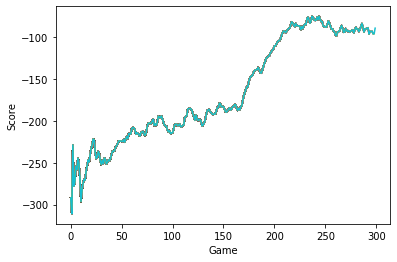

In [2]:
# Importing agent from policy gradient script
agent = PGAgent(alpha = 0.00001, input_dims = [8], gamma = 0.99, n_actions = 4, layer1_size = 2048, layer2_size = 512)
env = gym.make('LunarLander-v2')   #creating lunar lander environment
score_history = []                 #for storing the scores of each episode
num_episodes = 300                 # Defining total no. of states

for i in range(num_episodes):
    done = False                      # Boolean which when become true, a particular episode would end
    observation = env.reset()         # Resetting the environment
    score = 0
    while not done:
        action = agent.choose_action(observation)               # Choosing according to the policy learned
        observation_, reward, done, info = env.step(action)     # Taking one step and getting next state,rewards etc
        agent.learn(observation,reward, observation_, done)     # This is the learning step
        observation = observation_                              # Setting the learned state as next state
        score += reward                                         # Incrementing the score per step

    score_history.append(score)
    print('episode ', i, 'score %.2f' %score )

    filename = 'lunar_lander_discrete.png'
    plot_learning(score_history, filename, window = 50)         # Plotting the scores per episode

# Section : 2 :- Implementing Lunar Lander with Action Critic Algorithm

In the following section Actor-Critic algorithm is implememted for 300 episodes and results are not  good at all but it could 
have been much better if trained for more no. of episodes.

C:\Users\rahul\Downloads\Codes\actor_critic.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  policy = F.softmax(policy)


episode  0 score 41.72
episode  1 score -421.34
episode  2 score -467.17
episode  3 score -97.73
episode  4 score -115.69
episode  5 score -77.49
episode  6 score -296.71
episode  7 score -539.39
episode  8 score -124.21
episode  9 score -104.11
episode  10 score -350.81
episode  11 score -41.33
episode  12 score -330.78
episode  13 score -292.33
episode  14 score -483.53
episode  15 score -289.16
episode  16 score -297.42
episode  17 score -462.73
episode  18 score -111.93
episode  19 score -309.16
episode  20 score -523.61
episode  21 score -224.74
episode  22 score -238.32
episode  23 score -433.02
episode  24 score -328.23
episode  25 score -24.31
episode  26 score -232.18
episode  27 score -196.33
episode  28 score -252.64
episode  29 score -207.93
episode  30 score -371.30
episode  31 score -344.30
episode  32 score -317.63
episode  33 score -76.75
episode  34 score -80.86
episode  35 score -405.36
episode  36 score -302.23
episode  37 score -164.77
episode  38 score -361.60
epis

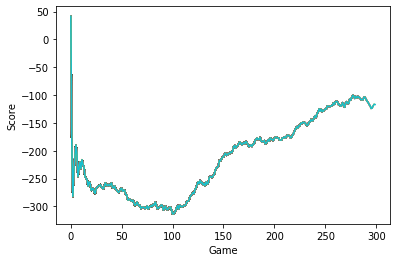

In [3]:
#Importing agent from Actor-critic script
agent = ACAgent(alpha = 0.00001, input_dims = [8], gamma = 0.99, n_actions = 4, layer1_size = 2048, layer2_size = 512)   
env = gym.make('LunarLander-v2')   #creating lunar lander environment
score_history = []                 #for storing the scores of each episode
num_episodes = 300                   # Defining total no. of states

for i in range(num_episodes):
    done = False                    # Boolean which when become true, a particular episode would end
    observation = env.reset()       # Resetting the environment
    score = 0
    while not done:
        action = agent.choose_action(observation)               # Choosing according to the policy learned
        observation_, reward, done, info = env.step(action)     # Taking one step and getting next state,rewards etc
        agent.learn(observation,reward, observation_, done)     # This is the learning step
        observation = observation_                              # Setting the learned state as next state
        score += reward                                         # Incrementing the score per step

    score_history.append(score)
    print('episode ', i, 'score %.2f' %score )

    filename = 'lunar_lander_discrete.png'
    plot_learning(score_history, filename, window = 50)         # Plotting the scores per episode

# Section : 3 :- Implementing Deep Q-Network Algorithm

In the following section Deep Q-Network is implemented and with expereince replay. Scores of 300 episodes are plotted and 
it can be seen it is much better then the former two results that is plotted above.

episode  0 score -242.42 average score -242.42 epsilon 0.99
episode  1 score -60.22 average score -151.32 epsilon 0.96
episode  2 score -289.84 average score -197.50 epsilon 0.90
episode  3 score -285.46 average score -219.49 epsilon 0.84
episode  4 score -187.24 average score -213.04 epsilon 0.79
episode  5 score -69.78 average score -189.16 epsilon 0.72
episode  6 score -124.45 average score -179.92 epsilon 0.67
episode  7 score -50.71 average score -163.77 epsilon 0.62
episode  8 score -90.82 average score -155.66 epsilon 0.55
episode  9 score -114.04 average score -151.50 epsilon 0.47
episode  10 score -60.39 average score -143.22 epsilon 0.39
episode  11 score -242.84 average score -151.52 epsilon 0.31
episode  12 score -230.68 average score -157.61 epsilon 0.17
episode  13 score -43.34 average score -149.45 epsilon 0.06
episode  14 score -48.10 average score -142.69 epsilon 0.01
episode  15 score 197.88 average score -121.40 epsilon 0.01
episode  16 score -68.71 average score -11

episode  271 score 224.91 average score -10.31 epsilon 0.01
episode  272 score 195.28 average score -7.51 epsilon 0.01
episode  273 score 82.59 average score -5.16 epsilon 0.01
episode  274 score 49.34 average score -4.84 epsilon 0.01
episode  275 score 156.05 average score -5.74 epsilon 0.01
episode  276 score 231.15 average score -5.36 epsilon 0.01
episode  277 score -49.26 average score -5.27 epsilon 0.01
episode  278 score -225.68 average score -7.86 epsilon 0.01
episode  279 score 202.53 average score -8.73 epsilon 0.01
episode  280 score -80.44 average score -11.21 epsilon 0.01
episode  281 score -34.21 average score -11.59 epsilon 0.01
episode  282 score -37.57 average score -11.29 epsilon 0.01
episode  283 score 226.80 average score -8.89 epsilon 0.01
episode  284 score 91.11 average score -7.30 epsilon 0.01
episode  285 score -139.59 average score -8.18 epsilon 0.01
episode  286 score 59.51 average score -6.90 epsilon 0.01
episode  287 score -9.67 average score -5.81 epsilon 0

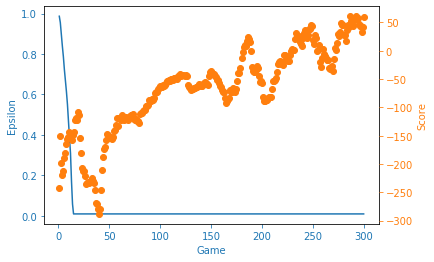

In [4]:
# Importing agent from Deep Q-network script
agent = DQNAgent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=4, eps_end=0.01,input_dims=[8], lr=0.001)
env = gym.make('LunarLander-v2')                   #Creating the lunar lander environment

scores, eps_history = [], []                       # Storing the scores and epsilon values per episode
n_games = 300                                    # Defining total no. of episodes

for i in range(n_games):
   # env = wrappers.Monitor(env, "tmp/lunar-lander", video_callable=lambda episode_id: True, force=True)
    score = 0
    done = False                    # Boolean which when become true, a particular episode would end
    observation = env.reset()       # Resetting the environment
    while not done:
        action = agent.choose_action(observation)                # Choosing action whichever is having max value
        observation_, reward, done, info = env.step(action)      # Taking one step and getting next state,rewards etc
        score += reward                                          # Incrementing the score per step
        agent.store_transition(observation, action, reward,      # Storing the agent experience 
                                observation_, done)
        agent.learn()                                            # Applying Q-learning updates on batches from experience sampled randomly 
        observation = observation_                                # Setting the learned state as next state
    scores.append(score)
    eps_history.append(agent.epsilon)

    avg_score = np.mean(scores[-100:])                              # Taking the mean of past 100 scores

    print('episode ', i, 'score %.2f' % score,
            'average score %.2f' % avg_score,
            'epsilon %.2f' % agent.epsilon)
x = [i+1 for i in range(n_games)]
filename = 'lunar_lander.png'
plotLearning(x, scores, eps_history, filename)                        # Plotting scores,epsilon per episode

In [7]:
# Lunar lander after 300 episodes 
env.reset()
for _ in range(500):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

Since, I executed only 300 episodes, so the result is not that good , it will surely give better results 
if number of episodes is increased.Here, I've executed it for only 300 episodes as I don't have any gpu.

![](Assets/lunar.gif)